# fashion mnist

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
time: 344 µs (started: 2024-07-01 08:53:36 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 9.25 s (started: 2024-07-01 08:53:36 +00:00)


## 1. 데이터 준비

In [3]:
# keras datasets 에서 가져오기
# 튜플로 뽑아야 함
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
time: 5.07 s (started: 2024-07-01 08:53:45 +00:00)


In [4]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

time: 3.59 ms (started: 2024-07-01 08:53:50 +00:00)


In [5]:
# label
columns = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

time: 445 µs (started: 2024-07-01 08:53:50 +00:00)


## 2. 데이터 확인

In [6]:
# 이미지 뽑아서 가져오기
#np.random.seed(42)
# 할때마다 다른 게 뽑힐 것
sample = np.random.randint(60000, size = 25) # 범위를 주고 이에서 내가 몇 개 뽑아서 사용
sample

array([ 9830, 56657,  9743,  6318, 38322, 33076, 59676, 48824, 19748,
       51193, 16660,  6776, 24342, 20886,   518, 33659, 59947, 56629,
       47914, 28511, 45196, 14517, 22248, 51195, 23045])

time: 7.51 ms (started: 2024-07-01 08:53:50 +00:00)


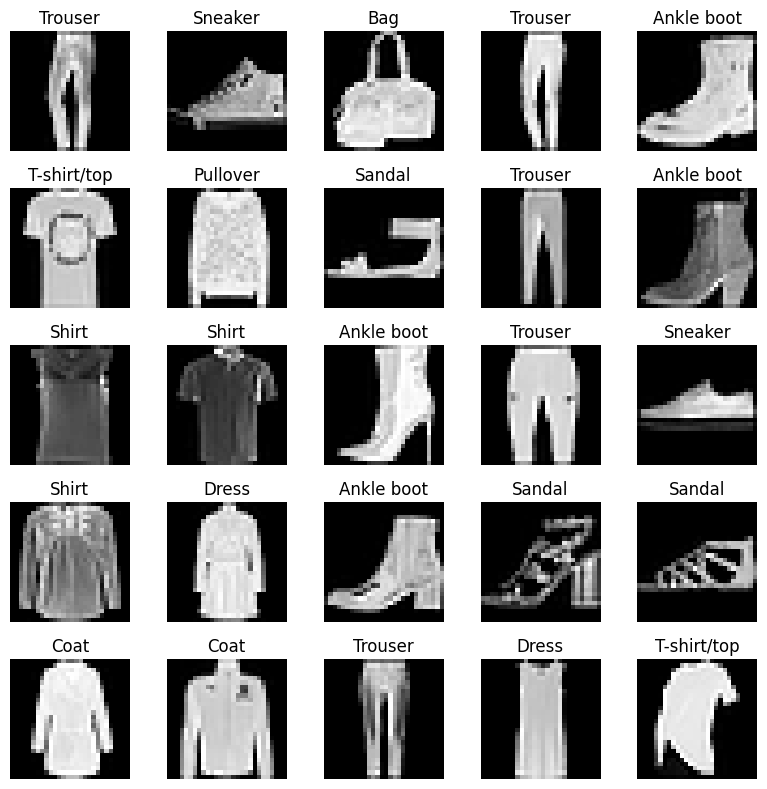

time: 4.65 s (started: 2024-07-01 08:53:50 +00:00)


In [7]:
# sample 25개를 그리기
fig = plt.figure(figsize = (8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1) # 5*5, 1번부터
    plt.imshow(X_train[idx], cmap = 'gray') # color map
    plt.axis('off') # 축을 지움
    plt.title(columns[y_train[idx]]) # 정답값 - 이름으로 출력
fig.tight_layout() # 보기 좋게 변경
plt.show()

# 학습이 잘 안됨

In [8]:
# y_train balance 보기
sr = pd.Series(y_train).value_counts().sort_index()
sr

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

time: 33.1 ms (started: 2024-07-01 08:53:55 +00:00)


<BarContainer object of 10 artists>

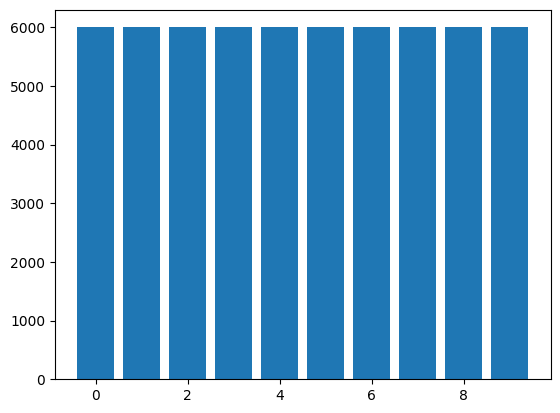

time: 912 ms (started: 2024-07-01 08:53:55 +00:00)


In [9]:
plt.bar(sr.index, sr)

## 3. 학습용, 검증용 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)
time: 406 ms (started: 2024-07-01 08:53:56 +00:00)


## 4. 전처리
* X_train, X_val : MinMaxScaler 사용해서 스케일링
* y_train, y_val : one-hot encoding

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,
          0,   0,  15,  33, 121, 113,   0,   0,   3,   0,   0,   0,  70,
         11,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,
         67, 189, 254, 214, 224, 209,  19,   0,   0,   0,   0,   0, 242,
        196,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 231,
        242, 227, 201, 178, 186, 208, 214,  95,   0,   0,   0, 102, 212,
        221,   0],
       [  0,   0,   0,   2,   2,   3,   0,   0,   0,  85, 252, 255, 205,
        137,  68, 163, 210, 206, 216, 246, 255, 241, 193, 177, 203, 194,
        228,  71],
       [  0,   2,   0,   0,   0,   0,   0,  92, 255, 255, 153,  65, 128,
        193, 161, 156, 203, 197, 203, 193, 200, 209, 225, 226, 220, 225,
        255, 171],
       [  0,   0,   0,   0,  17,  99, 232, 220, 134,  83, 125, 190, 213,
        202, 228, 163, 188, 206, 220, 215, 203, 192, 202, 234, 246, 240,
        244, 184],
       [  0,  38, 125, 152, 161, 163, 109,  69, 111, 163, 223, 144, 175,
        225, 221, 235, 183, 203, 217, 221, 223, 242, 253, 250, 233, 209,
        221, 212],
       [ 56, 207, 240, 239, 243, 240, 228, 226, 228, 211, 227, 206, 197,
        198, 208, 237, 230, 225, 230, 233, 237, 245, 242, 239, 241, 237,
        247, 221],
       [  0,  12,  24,  62,  87, 168, 231, 239, 236, 233, 225, 226, 225,
        230, 242, 246, 241, 236, 236, 246, 253, 253, 242, 236, 236, 227,
        255, 147],
       [  1,  14,   3,   4,   0,   0, 150, 255, 233, 239, 255, 255, 255,
        255, 255, 231, 189, 160, 143, 136, 115,  95,  78,  73,  70,  49,
         25,   0],
       [  0,   0,   0,   1,  13,   0,   0,   0,  10,  28,  42,  34,  29,
         29,  18,   0,   0,   0,   0,   0,   0,   0,   3,   1,   3,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

time: 26.6 ms (started: 2024-07-01 08:53:56 +00:00)


In [12]:
X_train_s = X_train / 255.
X_val_s = X_val / 255.

time: 159 ms (started: 2024-07-01 08:53:56 +00:00)


In [13]:
X_train_s[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

time: 15.5 ms (started: 2024-07-01 08:53:57 +00:00)


In [14]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 3.59 ms (started: 2024-07-01 08:53:57 +00:00)


In [15]:
y_train_o.shape, y_val_o.shape

((48000, 10), (12000, 10))

time: 4.99 ms (started: 2024-07-01 08:53:57 +00:00)


In [16]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

time: 6.08 ms (started: 2024-07-01 08:53:57 +00:00)


In [17]:
print(X_train_s.shape, X_val_s.shape)
print(y_train_o.shape, y_val_o.shape)
print(type(X_train_s), type(X_val_s))
print(type(y_train_o), type(y_val_o))

(48000, 28, 28) (12000, 28, 28)
(48000, 10) (12000, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 955 µs (started: 2024-07-01 08:53:57 +00:00)


## 모델 생성

In [18]:
X_train_s = X_train_s.reshape(-1, 28, 28, 1)
X_val_s = X_val_s.reshape(-1, 28, 28, 1)
print(X_train_s.shape, X_val_s.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
time: 1.18 ms (started: 2024-07-01 08:53:57 +00:00)


In [19]:
from keras import layers
# https://keras.io/api/layers/convolution_layers/convolution2d/
model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, activation="relu",
                  input_shape=(28, 28, 1)), # 데이터가 이미지 - 가로 * 세로 * 채널(3개 넣어줘야 함)
    layers.MaxPool2D(),
    layers.Dropout(0.2), # 학습 parameter를 가지지 X
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.MaxPool2D(),
    # NN에 집어 넣기
    layers.Flatten(), # 일렬로 줄을 세우기(다차원 -> 1차원)
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2), # 너무 과적합인 것을 방지
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

time: 1.28 s (started: 2024-07-01 08:53:57 +00:00)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0

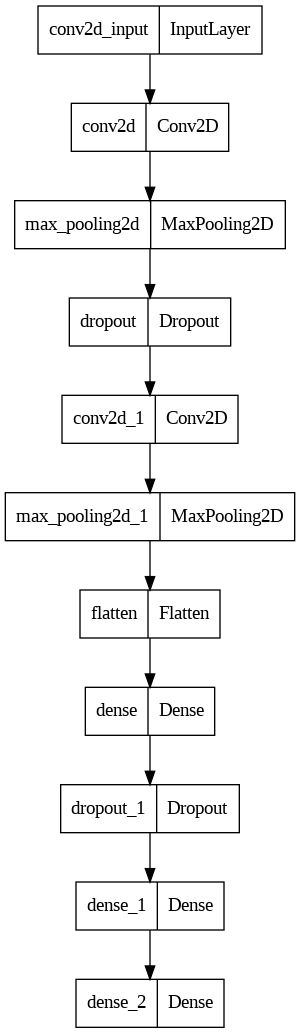

time: 314 ms (started: 2024-07-01 08:53:58 +00:00)


In [21]:
keras.utils.plot_model(model) # sequential이 아니라 funcapi 등을 쓰면 분기되고 합쳐지기도 함

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

time: 42.7 ms (started: 2024-07-01 08:53:58 +00:00)


In [23]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val_s, y_val_o))

Epoch 1/10
1500/1500 [==============================] - 20s 5ms/step - loss: 0.6089 - accuracy: 0.7728 - val_loss: 0.4345 - val_accuracy: 0.8408
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4056 - accuracy: 0.8497 - val_loss: 0.3569 - val_accuracy: 0.8655
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3517 - accuracy: 0.8701 - val_loss: 0.3141 - val_accuracy: 0.8830
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3193 - accuracy: 0.8808 - val_loss: 0.2890 - val_accuracy: 0.8945
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2950 - accuracy: 0.8896 - val_loss: 0.2875 - val_accuracy: 0.8920
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2778 - accuracy: 0.8964 - val_loss: 0.2799 - val_accuracy: 0.8978
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2636 - accuracy: 0.9016 - val_loss: 0.2756 - val_accuracy

In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 3.23 ms (started: 2024-07-01 08:56:23 +00:00)


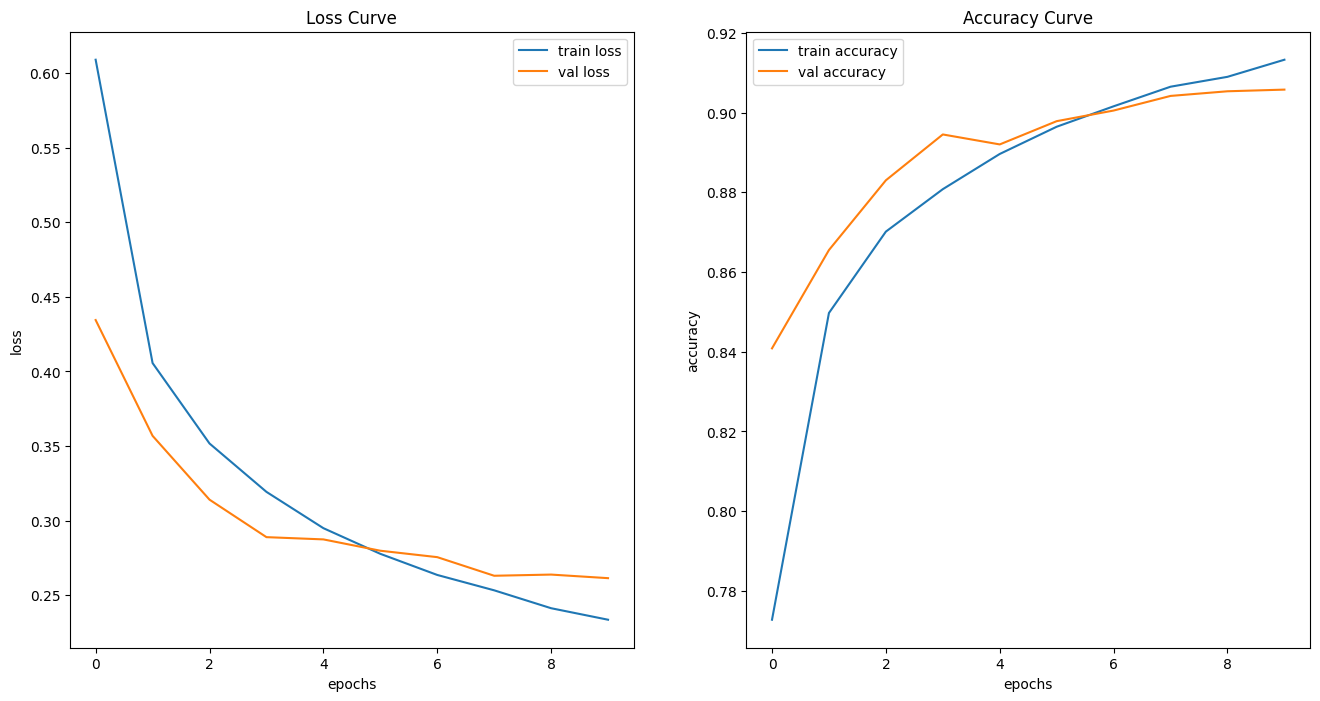

time: 1.53 s (started: 2024-07-01 08:56:23 +00:00)


In [25]:
plot_history(history)

## 6. 평가

In [38]:
X_test_s = X_test / 255.
X_test_s = X_test_s.reshape(-1, 28, 28, 1)
y_test_o = to_categorical(y_test)
print(X_test_s.shape, y_test_o.shape)
print(y_test)

(10000, 28, 28, 1) (10000, 10)
[9 2 1 ... 8 1 5]
time: 95.2 ms (started: 2024-07-01 08:59:28 +00:00)


In [27]:
y_pred = model.predict(X_test_s)

313/313 [==============================] - 1s 3ms/step
time: 1.63 s (started: 2024-07-01 08:56:25 +00:00)


In [28]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

time: 3.74 ms (started: 2024-07-01 08:56:26 +00:00)


In [29]:
y_test.shape, y_pred.shape

((10000,), (10000,))

time: 3.51 ms (started: 2024-07-01 08:56:26 +00:00)


accuracy: 0.9015
recall_score: 0.9014999999999999
precision_score: 0.9014654556309282
f1_score: 0.9007329619445171


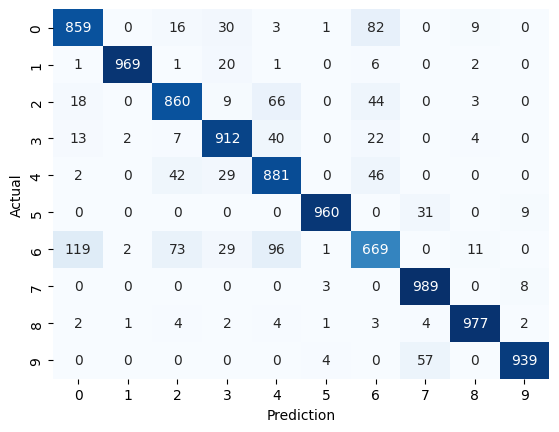

time: 390 ms (started: 2024-07-01 08:56:26 +00:00)


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
def print_metrics(y_true, y_pred, aver='macro'):
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("recall_score:", recall_score(y_true, y_pred, average = aver))
    print("precision_score:", precision_score(y_true, y_pred, average = aver))
    print("f1_score:", f1_score(y_true, y_pred, average = aver))
    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()
print_metrics(y_test, y_pred, aver='macro')

In [31]:
# 틀린 값만 뽑기
wrong_data = np.where(y_test != y_pred)[0]
pd.Series(wrong_data).value_counts().sum()

985

time: 5.77 ms (started: 2024-07-01 08:56:27 +00:00)


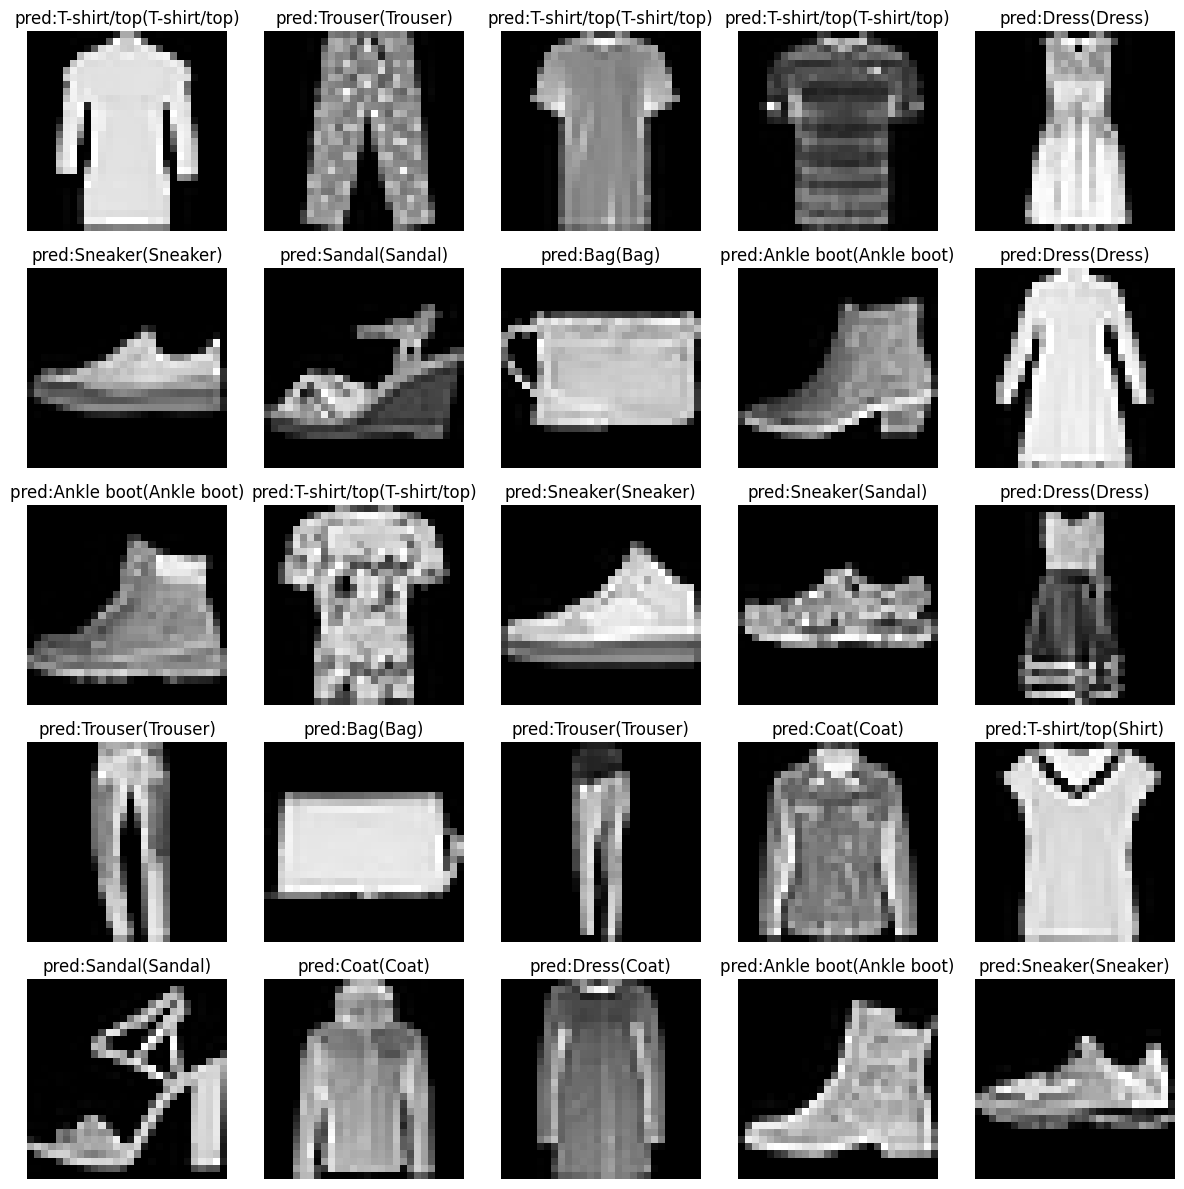

time: 1.94 s (started: 2024-07-01 08:56:27 +00:00)


In [32]:
wrong_data = np.random.randint(980, size = 25)

fig = plt.figure(figsize = (12, 12))
for i, idx in enumerate(wrong_data):
    plt.subplot(5, 5, i+1) # 5*5, 1번부터
    plt.imshow(X_test[idx], cmap = 'gray') # color map
    plt.axis('off') # 축을 지움
    plt.title(f'pred:{columns[y_pred[idx]]}({columns[y_test[idx]]})') # 정답값
fig.tight_layout() # 보기 좋게 변경
plt.show()

## 7. 모델 저장

In [33]:
# keras - 파일이 하나로 저장됨
# tensorflow - 여러 개 파일로 된 저장 방식 -> javascript 방식으로 변환하기 쉬움
model.save('cnn_multi_fashion.h5') # h5는 keras 모델에서 저장

time: 45.9 ms (started: 2024-07-01 08:56:29 +00:00)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model.save('cnn_multi_fashion.keras')

time: 47.3 ms (started: 2024-07-01 08:56:29 +00:00)


In [35]:
# tensorflow 형식으로 저장 - 여러 파일로 저장됨
model.save('cnn_multi_fashion')

time: 1.08 s (started: 2024-07-01 08:56:29 +00:00)


In [36]:
# 모델 읽어오기
#from keras.models import load_model
loaded_model = keras.saving.load_model('cnn_multi_fashion.h5')

time: 143 ms (started: 2024-07-01 08:56:30 +00:00)


In [37]:
loaded_model.summary() # 입력 : 2pixel 줄어드므로 28이라고 예상 or 보고서에 작성되어 있음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0